In [1]:
import os
from pathlib import Path
ROOT = Path("")

import matplotlib.pyplot as plt
import json
import seaborn as sns
from tqdm import tqdm

In [2]:
def return_names_for_path(dataset, setup):
    if dataset=="CIFAR10":
        size = "large"
    else:
        size = "small"
    
    if setup == "seed":
        zoo_p = f"cnn_{size}_{dataset.lower()}_ard"
    elif setup == "hyp-10-f":
        zoo_p = f"cnn_{size}_{dataset.lower()}_fixed_ard"
    else: 
        zoo_p = f"cnn_{size}_{dataset.lower()}_rand_ard"

    return zoo_p

In [3]:
# Define parameters
dataset = "CIFAR10"
setup = "hyp-10-f"

In [4]:
# path to model zoo checkpoints
zoo_p = return_names_for_path(dataset, setup)
checkpoint_path = os.path.join(ROOT, f"/ds2/model_zoos/zoos_sparsified/distillation/zoos/{dataset}/ARD/{zoo_p}")

accuracy_list = []
counter = 0
for path in tqdm(os.listdir(checkpoint_path)):
    if not os.path.isfile(os.path.join(checkpoint_path, path)):
        if not os.path.exists(os.path.join(checkpoint_path, path, "error.txt")):
            try:
                for i, line in enumerate(open(os.path.join(checkpoint_path, path, "result.json"), "r")):
                    if i==25:
                        accuracy_list.append(json.loads(line)["test_acc"])
            except:
                counter += 1

            
            

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1285/1285 [07:48<00:00,  2.75it/s]


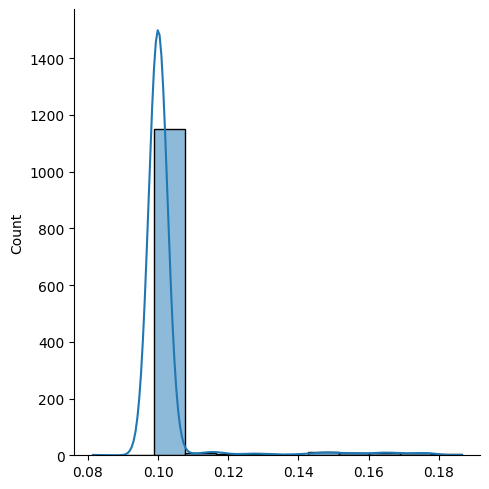

In [5]:
sns.displot(accuracy_list, kde=True)

In [8]:
counter

1212

In [9]:
accuracy_list

[]